# <span style= 'color:Gold'> End to End HR Analytics Project </span>

In [1]:
!pip install PyMySQL

## <span style= 'color:Blue'> Importing Necessary Libraries </span>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn import tree

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

import pymysql
from functools import reduce
pd.set_option('display.max_column', None)

## <span style= 'color:Blue'> Connection to the Database </span>

In [3]:
dbcon = pymysql.connect(host = 'localhost', user = 'root', password = 'FlyingBeast@11', database = 'jobms')

## <span style= 'color:Blue'> Reading the data from Database </span>

In [4]:
df = pd.read_sql_query("""Select * from consolidated_search_ds;""", dbcon)

## <span style= 'color:Blue'> Exploratory Data Analysis (EDA) </span>

    * Head of the Dataset (Initial 5 rows of the dataset)

In [5]:
df.head()

,Job Title,Company,Area,Employer Email,Employer Contact Number,Salary,Lower Salary Range,Upper Salary Range,Job Highlights,Job Description,Career Level,Qualification,Years of Experience,Job Type,Company Website,Job Link,Job Functions,Industry,Search Term,Date Posted,Date Scraped,Data Source,jobtick_avgsalary,jobtick_SQL,jobtick_Excel,jobtick_dashboard,jobtick_Python,jobtick_engineerjobs,jobtick_analystjobs,jobtick_scientistjobs
0,Business Analyst (Data Analysis),EC Healthcare,Not Specified,None,None,Not Specified,NaN,NaN,"['Develop and built segmentation platform', 'Conduct commercial and financial analysis', 'Ensure a valid data analyzing process']","['Job Descriptions:', 'Develop strategic KPIs with the objective of controlling and enhancing the business procedures and customer experience', 'Conduct commercial (Sales and Sales related KPIs) and financial analysis (PL)', 'Assist the Project manager and work with the team to design, manage analytics projects and solution for generating useful business insights, correlation of brands and customer spending behavior', 'Develop and built segmentation platform for effective filtering of targeted customer list for enabling data driven marketing. Perform evaluation of segmentation used in different marketing channels', 'Work closely with various business units for user requirements collection and projects implementation', 'Support and align efforts to drive business process analysis meeting to support the Business Unit', 'Manage business expectations by developing a communication process to keep others up-to-date on project results; as well as performance tracking, as daily, weekly and monthly basis', 'Identify, create and facilitate process design changes by conducting business and systems process analysis and design at a complex level', 'Work on regular business performance reports for useful business insights', 'Ensure a valid data analyzing process\xa0including data extraction, manipulation, processing, storage, archival and more', 'Requirements:', 'Degree in Data Science, Business, Information Technology or related discipline', 'At least 2-years in-depth experience in data warehouse and BI platform, Tableau preferred', 'Experience in data analytics design and segmentation', 'Knowledge in SQL and Python coding or correlation calculation platform', 'Proficiency in relational databases and data integration tools', 'Good problem-solving skills', 'Ability to work independently under pressure', 'Self-motivated, work proactive and willing to learn new technology', 'Good presentation, interpersonal and communication skills', 'Excellent command of both spoken and written English and Chinese', 'Experienced in working SQL knowledge and experience working with relational databases, query authoring (SQL) as well as working familiarity with a variety of databases is preferred.', 'Experienced in managing and developing data integration, ETL with data warehouse, Google Analytics, Google Tag Manager and BI platform is preferred.', 'Capability to maintain ETL processes is a plus']",Entry,Not Specified,-1.0,"Full Time, Permanent",Not Specified,/hk/en/job/business-analyst-data-analysis-100003008838232,"Information Technology (IT), DBA, E-commerce, Product Management / Business Analyst, Data Scientist",Health & Beauty Care,Data Scientist,10-22-2021,22-10-2021,JobsDB,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN
1,Data Analyst Leader,A4lution Limited,Not Specified,None,['3955 8549'],Not Specified,NaN,NaN,"['Drive automation of analytical projects', 'Innovate new technology for the company', 'Able to extract, the data into actionable insights']","['Responsibilities:', 'Work closely with senior management to understand their needs and provide actionable solutions for business', 'Understand core business needs, summarize into requirements and create clear specifications for developing the relevant analytics framework.', 'Lead a team to support the database, including data requirement management, data ingestion manage

### <span style= 'color:Green'> * Details of the Dataframe </span>

In [6]:
def df_Details(df):
    
    print(f"Shape of the Dataframe :{df.shape}")
    print()
    
    print(f"Summary of the Dataframe : ", '\n')
    print(df.info(), '\n')
    print()
    
    print(f"Statistical Summary of the Dataframe : {df.describe()}")
    print()
    print(f"Columns of the Dataframe : {df.columns}")
    print()
    
    print(f"Checking for null values in the Dataframe : {df.isnull().sum()}")
    print()

In [7]:
df_Details(df)

Shape of the Dataframe :(3211, 30)

Summary of the Dataframe :  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3211 entries, 0 to 3210
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Job Title                3211 non-null   object 
 1   Company                  3211 non-null   object 
 2   Area                     3211 non-null   object 
 3   Employer Email           167 non-null    object 
 4   Employer Contact Number  358 non-null    object 
 5   Salary                   3211 non-null   object 
 6   Lower Salary Range       318 non-null    float64
 7   Upper Salary Range       318 non-null    float64
 8   Job Highlights           3211 non-null   object 
 9   Job Description          3211 non-null   object 
 10  Career Level             3211 non-null   object 
 11  Qualification            3211 non-null   object 
 12  Years of Experience      3211 non-null   float64
 13  Job Type    

### <span style= 'color:Green'> * Insights of Each Cloumn values in the Dataframe </span>

In [16]:
def value_Insights_Columns(df):
    
    for i in df.columns:
        
        print(f" * Column Name --> {i}", '\n')
        print()
        
        print(f"Number of Unique Values: {df[i].nunique()}")
        print()
        
        print(f"Count of each unique values : {df[i].value_counts()}")
        print()


In [17]:
value_Insights_Columns(df)

 * Column Name --> Job Title 


Number of Unique Values: 2789

Count of each unique values : Business Analyst                                                    46
System Analyst                                                      35
Analyst Programmer                                                  31
Data Analyst                                                        25
Data Scientist                                                      17
                                                                    ..
Enterprise Compute Specialist                                        1
Service Engineer (Fresh graduates are also welcome)                  1
Senior Security Consultant                                           1
Senior Analyst / Analyst (Application Development) (three posts)     1
Project Management Officer                                           1
Name: Job Title, Length: 2789, dtype: int64

 * Column Name --> Company 


Number of Unique Values: 1232

Count of each unique

### <span style= 'color:Green'> Checking and Dropping the Duplicate values in the Dataframe </span>

In [10]:
def removal_Duplicates(df):
    
    if df.duplicated().sum() > 0:
        
        print(f"Dataframe contains duplicate values : {df.duplicated().sum()}")
        df.drop_duplicates(inplace = True, ingnore_index = True)
        print()
        
        print(f"Dataframe after the removing the duplicate values : ")
        print(df)
        
    else:
        print("Dataframe does not contain any duplicate values")     

In [11]:
removal_Duplicates(df)

Dataframe does not contain any duplicate values


#### <span style= 'color:Red'> * Interpretations from the above statistics </span>

 * Total Number of **Companies** : **1232**
 * Total Number of **Industires** : **51**
 * Total Number of **Job Types** : **41**


 * Total Number of **Entry Level** Jobs: **328**
 * Total Number of **Middle Level** Jobs: **1000**
 * Total Number of **Senior Level** Jobs: **883**
    
    
 * Total Number of **Data Scientist** Jobs: **2490**
 * Total Number of **Data Analyst** Jobs: **502**
 * Total Number of **Data Engineering** Jobs: **55**
 * Total Number of **Machine Learning Engineer** Jobs: **55**
 * Total Number of **Business Intelligence** jobs: **27**   

## <span style= 'color:Blue'> * Data Visualisation </span>

#### <span style= 'color:Red'> 1. Career Level </span>

	From the below pie chart, it can be seen that there are more entry level jobs in Data Feild

<AxesSubplot:title={'center':'Number of Job Title by career level'}, ylabel='Career Level'>

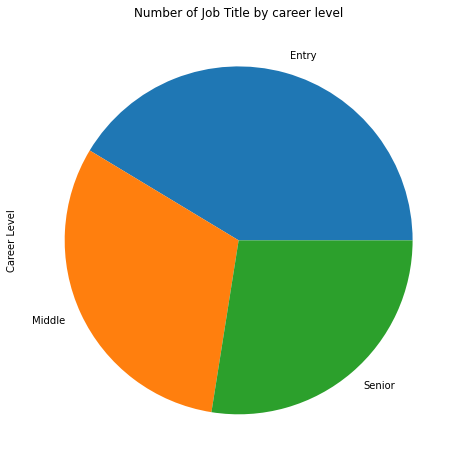

In [26]:
df['Career Level'].value_counts().plot(kind = 'pie', figsize = (8,8), title = 'Number of Job Title by career level')

#### <span style= 'color:Red'> 2. Search Term </span>

	* The bar graph shows that Data Scientist is the most searched jobs follwed by Data Analyst.
    
    * The least job searched is Machine Learning Engineer.

<AxesSubplot:>

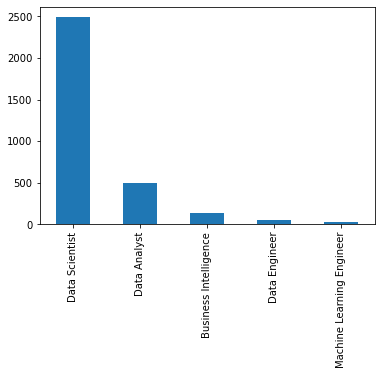

In [27]:
df['Search Term'].value_counts().plot.bar()

#### <span style= 'color:Red'> 3. Qualifications </span>

* In terms of Qualification, the bar graph shows that the "Degree" is the most required qualification for     the job applications.

<AxesSubplot:>

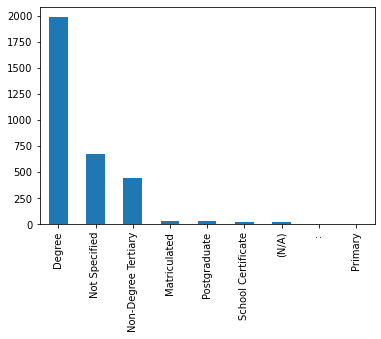

In [28]:
df['Qualification'].value_counts().plot.bar()

#### <span style= 'color:Red'> 4. Job Type </span>

	* Full Time and Permanent type of jobs are more when compared to other types of jobs like Contract, Full Time 		Contract and Permanent. 

<AxesSubplot:title={'center':'Types of Jobs'}, ylabel='Job Type'>

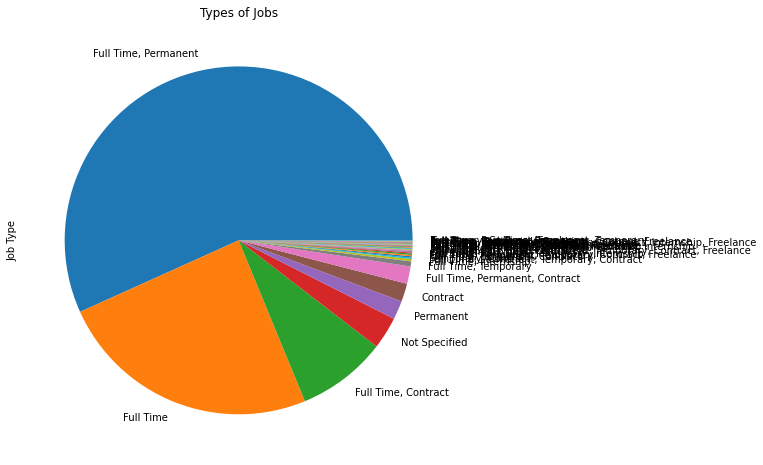

In [31]:
df['Job Type'].value_counts().plot(kind = 'pie', figsize = (8,8), title = 'Types of Jobs')

#### <span style= 'color:Red'> 5. Year of Experience </span>

* For entry level jobs there is prior no experience required for the jobs as per the bar graph

<AxesSubplot:>

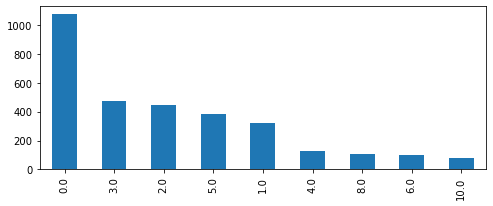

In [38]:
df['Years of Experience'].replace(-1, 0).value_counts()[:10].plot.bar(figsize = (8,3))

#### <span style= 'color:Red'> 6. Salary </span>

<AxesSubplot:>

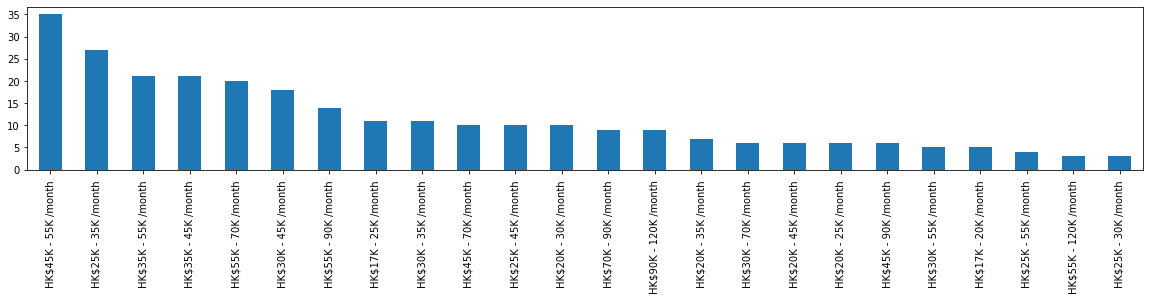

In [40]:
df['Salary'].value_counts()[1:25].plot.bar(figsize = (20,3))

### * Columns in the Dataframe

In [41]:
df.columns

Index(['Job Title', 'Company', 'Area', 'Employer Email',
       'Employer Contact Number', 'Salary', 'Lower Salary Range',
       'Upper Salary Range', 'Job Highlights', 'Job Description',
       'Career Level', 'Qualification', 'Years of Experience', 'Job Type',
       'Company Website', 'Job Link', 'Job Functions', 'Industry',
       'Search Term', 'Date Posted', 'Date Scraped', 'Data Source',
       'jobtick_avgsalary', 'jobtick_SQL', 'jobtick_Excel',
       'jobtick_dashboard', 'jobtick_Python', 'jobtick_engineerjobs',
       'jobtick_analystjobs', 'jobtick_scientistjobs'],
      dtype='object')